<a href="https://colab.research.google.com/github/ProfAI/machine-learning-fondamenti/blob/main/6%20-%20Clustering/clustering_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Clustering della clientela di un centro commerciale
In questa esercitazione dovrai eseguire la segmentazione della clientela di un centro commerciale utilizzando il dataset che puoi trovare [qui](https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/main/datasets/mall_customers.csv).

Le informazioni di cui disponi sono:
 - **CustomerID**: codice identificativo del cliente.
 - **Gender**: sesso del cliente.
 - **Age**: età del cliente.
 - **Annual Income (k$)**: reddito annuo del cliente in 1000 dollari.
 - **Spending Score (1-100)**: punteggio assegnato al cliente in base alla spesa.


Per segmentare la clientela devi creare un modello di clustering utilizzando l'algoritmo kmeans, fanne più di uno, utilizzando le seguenti informazioni:
 1. Age e Spending Score
 2. Annual Income e Spending Score
 3. Age, Annual Income e Spending Score


Per ogni modello utilizza l'Elbow Method per determinare il numero di cluster e visualizza i cluster tramite uno scatterplot.<br/> Utilizza l'ultimo modello per associare questi clienti ad un cluster, esporta il risultato in un file EXCEL chiamato *mall_customers_prediction.xlsx* contentente due colonne:
 - **CustomerID**: il codice identificativo del cliente
 - **Customer Group**: il cluster di appartenenza

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams["figure.figsize"] = (16,10)
sns.set_theme(palette="dark")

In [4]:
BASE_URL = "https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/main/datasets/"
RANDOM_SEED = 1

In [5]:
df = pd.read_csv(BASE_URL+"mall_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values

In [7]:
def plot_ssd_curve(data):
  
  ssd = {}
  for k in range(1, 10):
      kmeans = KMeans(init="k-means++", n_clusters=k, random_state=RANDOM_SEED).fit(data)
      ssd[k] = kmeans.inertia_
  plt.figure()
  plt.plot(list(ssd.keys()), list(ssd.values()),marker='o')
  plt.xlabel("Numero di cluster", fontsize=16)
  plt.ylabel("Somma delle distanza al quadrato", fontsize=16)
  plt.show()


/Users/andrea/opt/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/andrea/opt/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/andrea/opt/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/andrea/opt/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

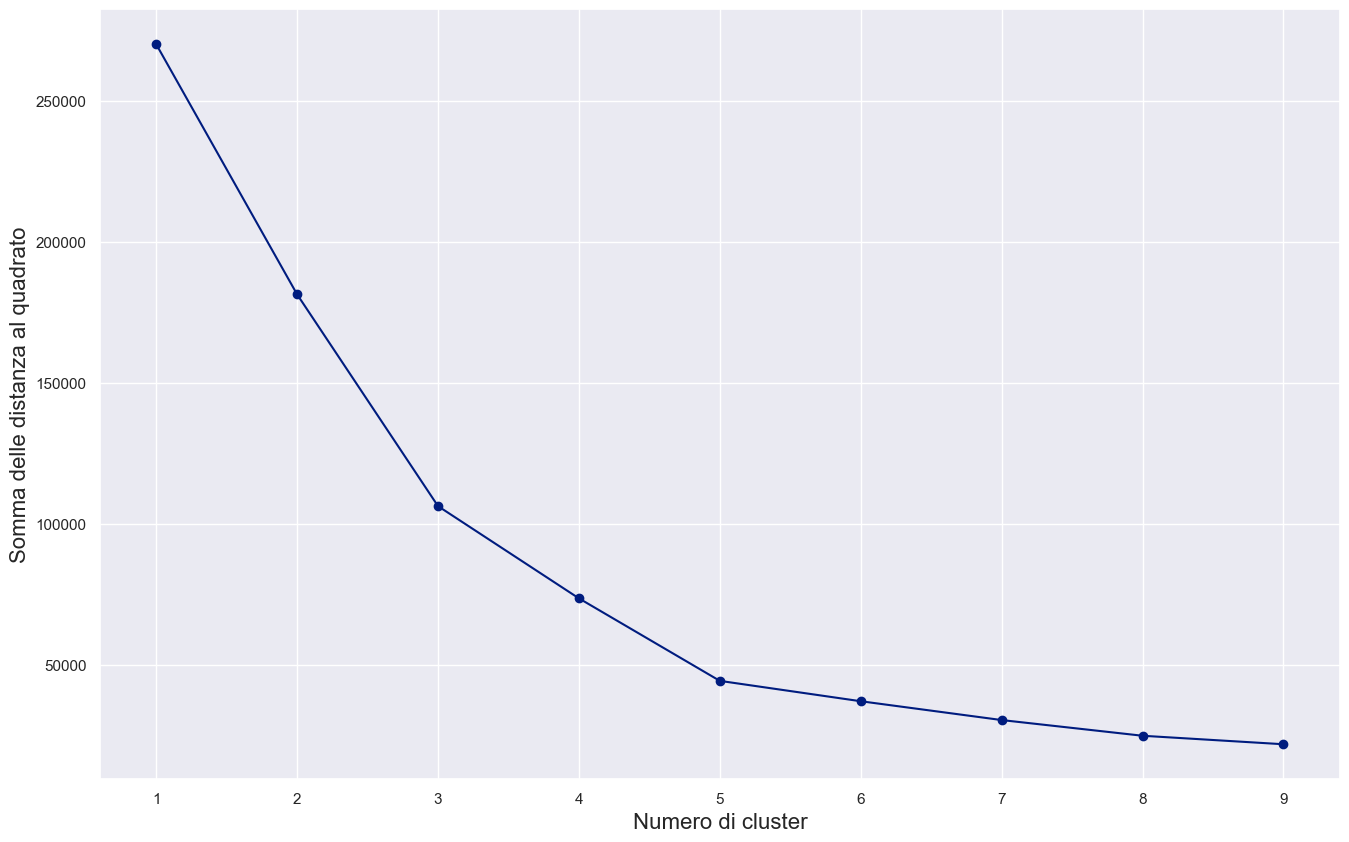

In [8]:
plot_ssd_curve(X)

In [10]:
def plot_clusters(model, data, axlabels=None, print_ssd=False):
  y_pred = model.predict(data)
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=y_pred, s=100)
  plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', s=200, alpha=0.5)

  if axlabels!=None:
    plt.xlabel(axlabels[0], fontsize=16)
    plt.ylabel(axlabels[1], fontsize=16)

  if print_ssd:
    plt.text(X[:,0].max()-10, 0, f"SSD={model.inertia_:.2f}")

  plt.show()

/Users/andrea/opt/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


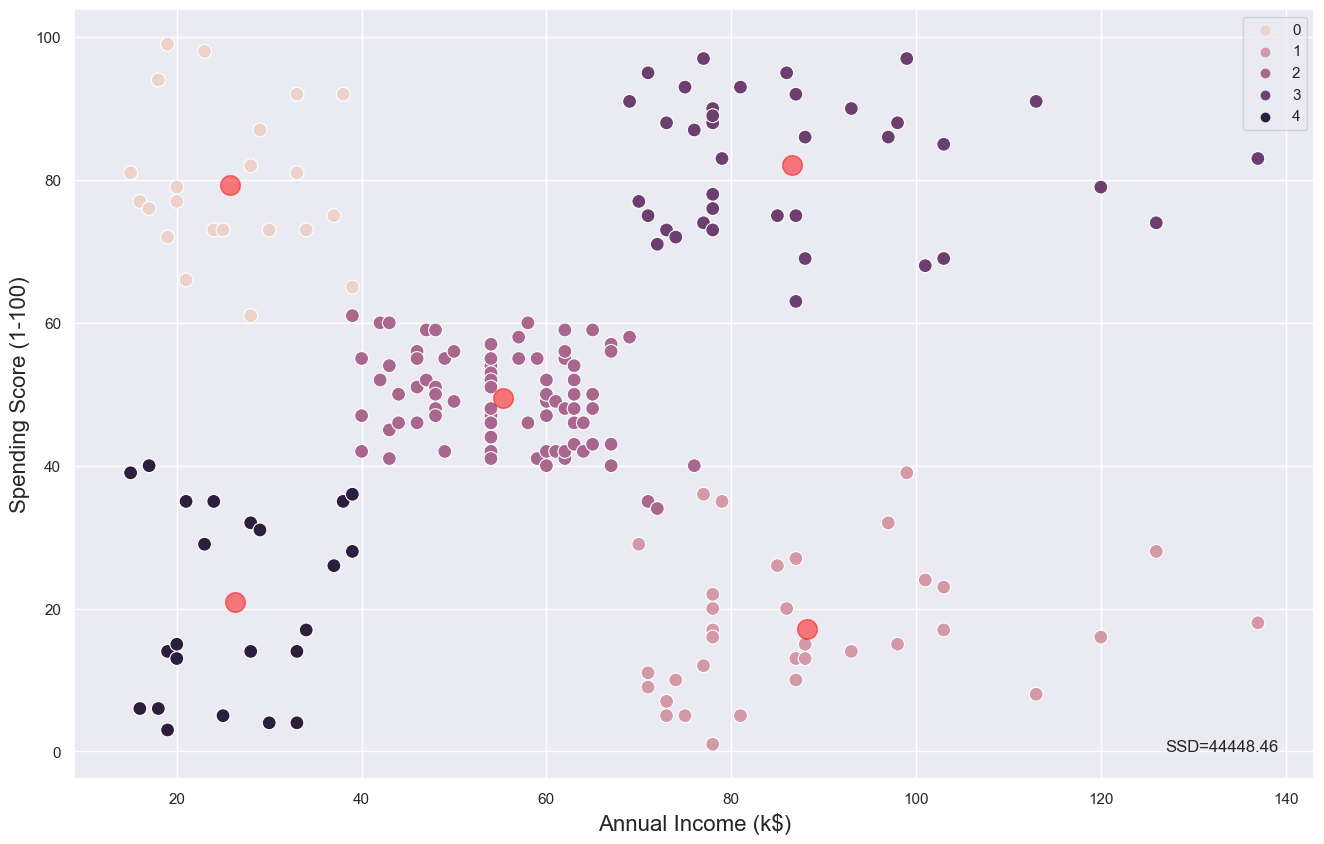

In [11]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = RANDOM_SEED)
kmeans.fit(X)
plot_clusters(kmeans, X, axlabels=["Annual Income (k$)","Spending Score (1-100)"], print_ssd=True)

In [12]:
X = df[["Age", "Spending Score (1-100)"]].values

/Users/andrea/opt/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/andrea/opt/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/andrea/opt/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/andrea/opt/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

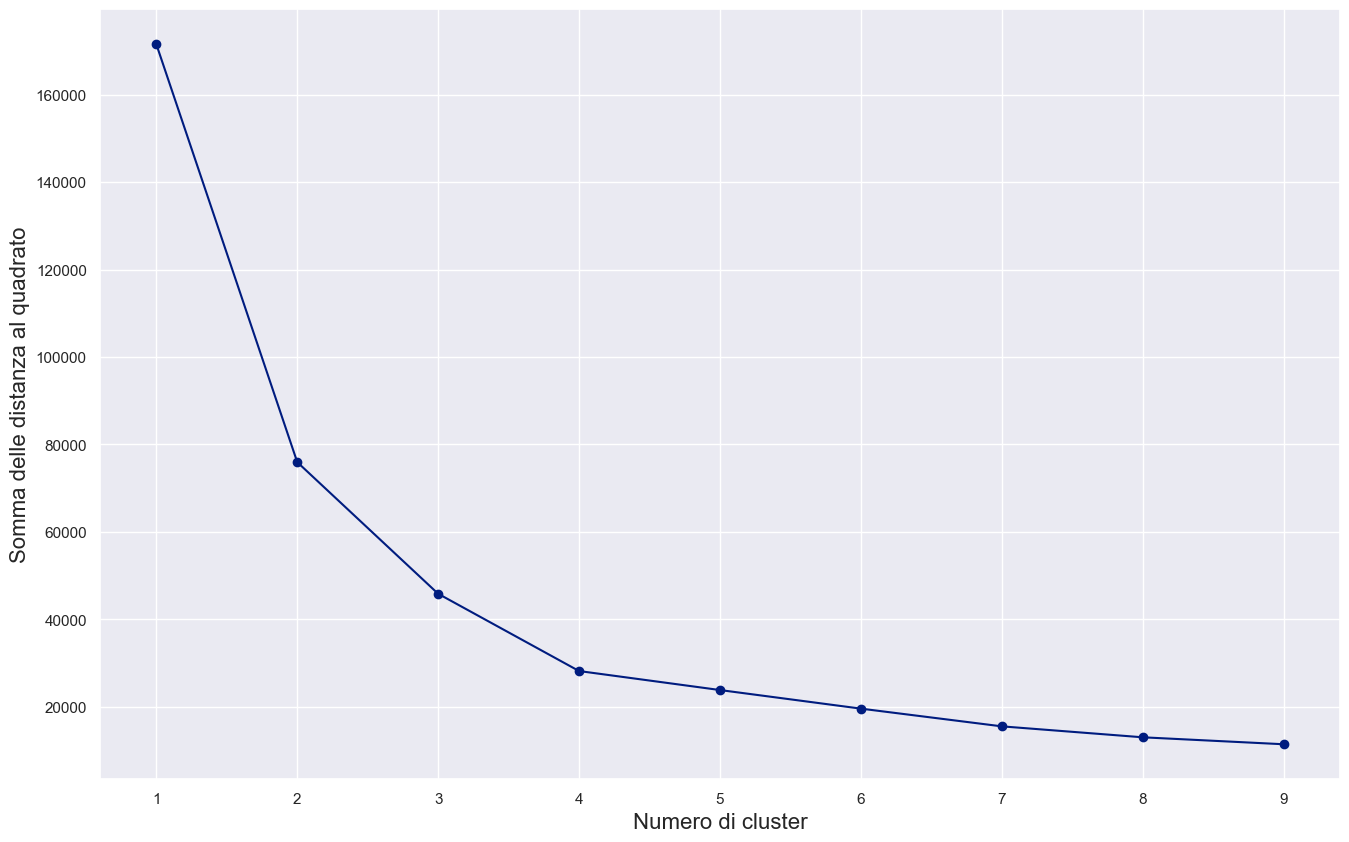

In [13]:
plot_ssd_curve(X)

/Users/andrea/opt/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


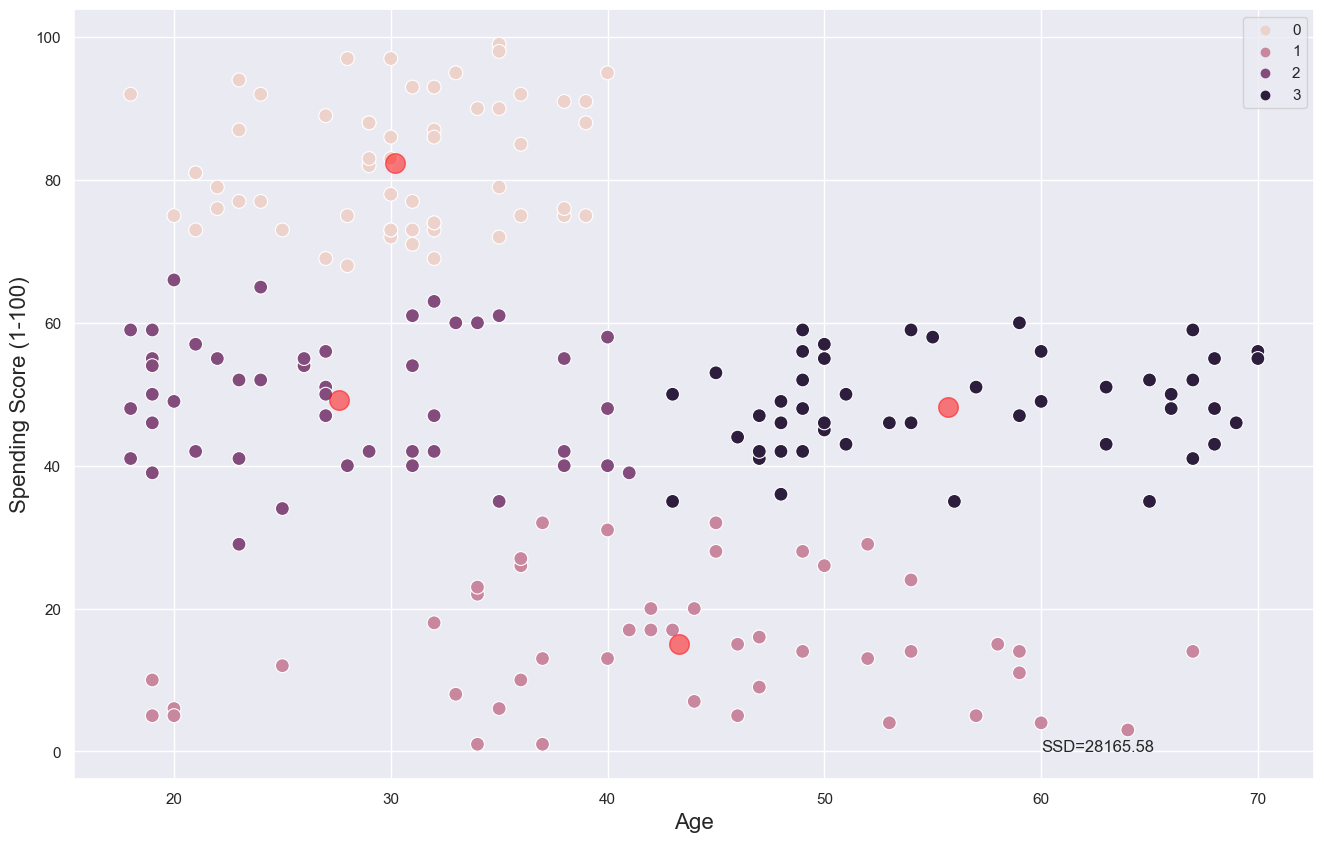

In [14]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = RANDOM_SEED)
kmeans.fit(X)
plot_clusters(kmeans, X, axlabels=["Age","Spending Score (1-100)"], print_ssd=True)

In [15]:
X = df[[ "Age", "Spending Score (1-100)", "Annual Income (k$)"]].values

/Users/andrea/opt/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/andrea/opt/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/andrea/opt/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/andrea/opt/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

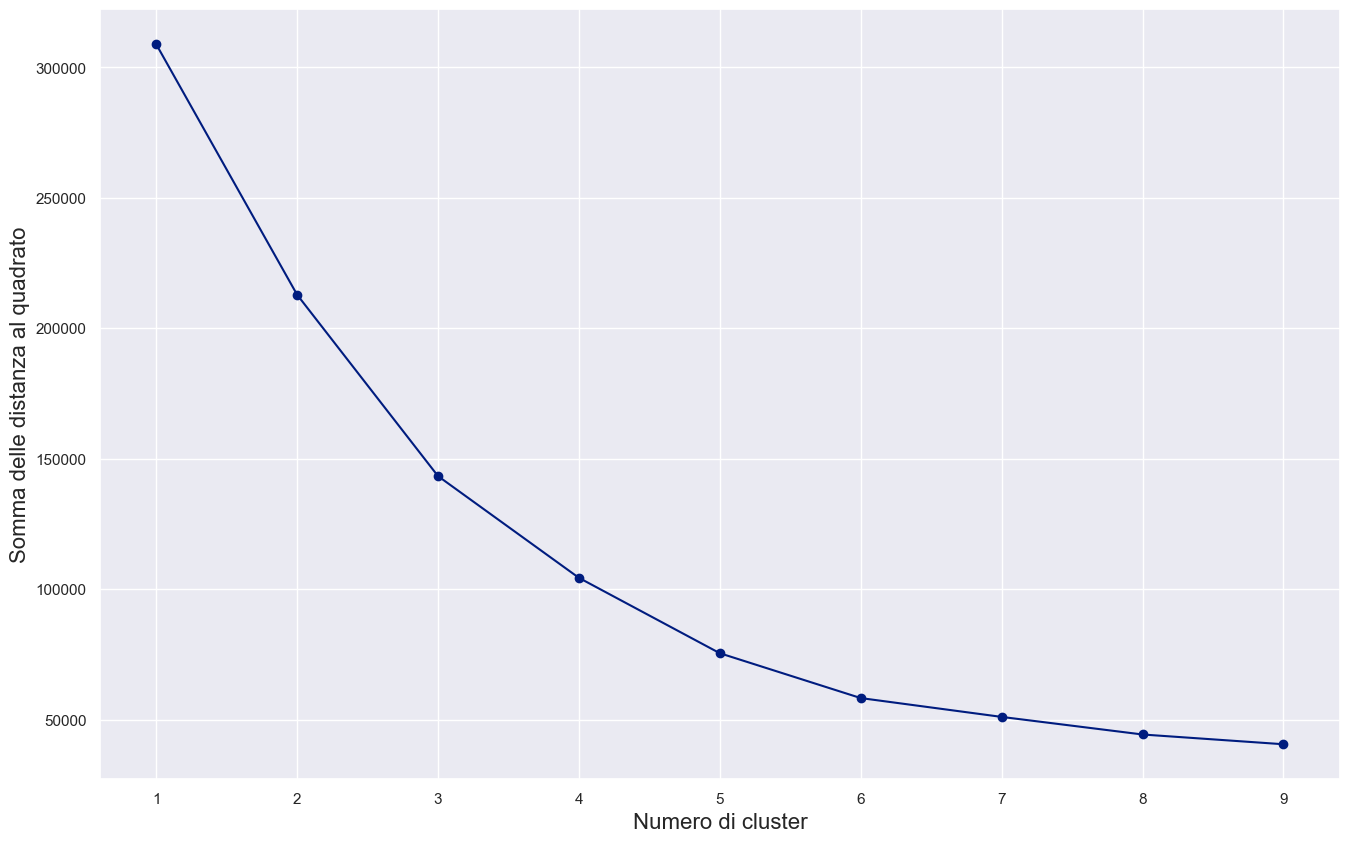

In [16]:
plot_ssd_curve(X)

In [17]:
from mpl_toolkits import mplot3d

def plot_clusters3d(model, data, axlabels=None):
  y_pred = model.predict(data)

  ax = plt.axes(projection ="3d")
  ax.scatter3D(data[:,0], data[:,1], data[:,2], edgecolors= "black", c=y_pred)
  ax.scatter3D(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], color="red", s=100)

/Users/andrea/opt/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


75479.76429338777


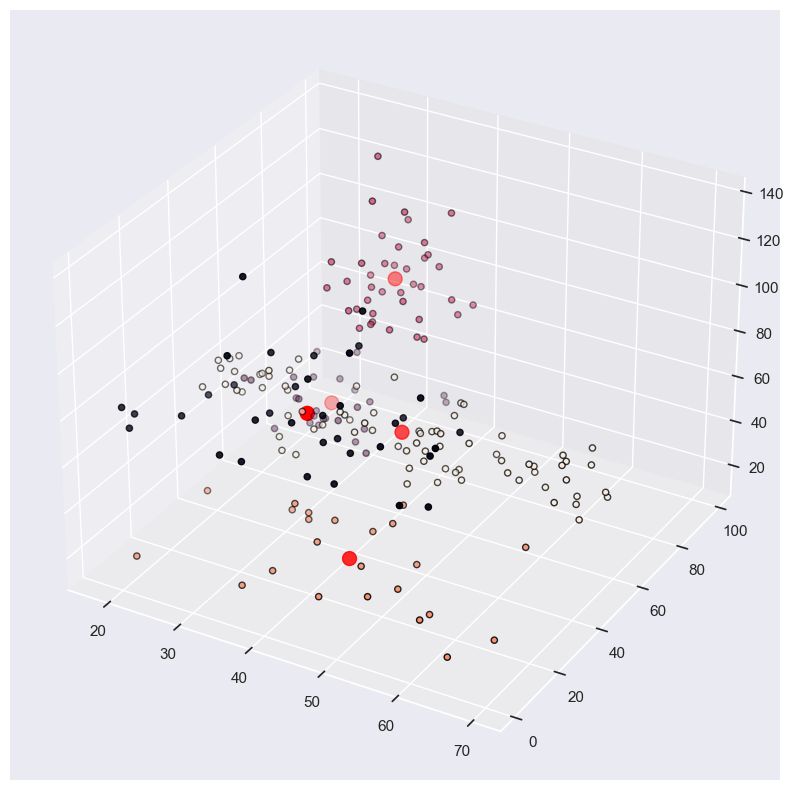

In [18]:
kmeans = KMeans(n_clusters=5, init = 'k-means++', random_state = RANDOM_SEED)
kmeans.fit(X)
print(kmeans.inertia_)
plot_clusters3d(kmeans, X, axlabels=["Age","Spending Score (1-100)"])

In [24]:
%matplotlib notebook

In [31]:
kmeans = KMeans(n_clusters=5, init = 'k-means++', random_state = RANDOM_SEED)
kmeans.fit(X)
plot_clusters3d(kmeans, X, axlabels=["Age","Spending Score (1-100)"]) # non funzionante su Google Colaboratory

/Users/andrea/opt/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<IPython.core.display.Javascript object>

In [26]:
df_pred = pd.read_csv(BASE_URL+"mall_customers_predict.csv")
df_pred.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,40,71,95
1,2,Male,36,87,10
2,3,Female,50,58,46
3,4,Male,47,71,9
4,5,Female,29,98,88


In [27]:
X = df_pred[[ "Age", "Spending Score (1-100)", "Annual Income (k$)"]].values

In [28]:
y_pred = kmeans.predict(X)
y_pred

array([2, 0, 4, 0, 2], dtype=int32)

In [30]:
df_result = pd.DataFrame({
    "CustomerID":df_pred["CustomerID"],
    "Customer Group":y_pred,
})

df_result.to_excel("mall_customers_prediction.xlsx")